<a href="https://colab.research.google.com/github/flandreis/Tarea1_Python_inGC/blob/main/Mpox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### conectar a una base de datos

El módulo **Bio.Entrez** le da acceso a Python a las bases de datos en línea de NCBI.

**EInfo** - Proporciona de información sobre las bases de datos

In [37]:
pip install biopython

In [38]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from Bio import Entrez, SeqIO

Entrez.email = "a223207571.unison.mx"

info = Entrez.einfo()
readinfo = Entrez.read(info)
print(readinfo["DbList"])

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']




# Actividad de tarea
*Cadena del gen Monkeypox Virus B14R *

In [40]:
input_file = "/content/sequence.gb"

output_file = "/content/sequence (Mpox).fasta"
with open(output_file, "w") as output_handle:
    for seq_record in SeqIO.parse(input_file, "genbank"):
        SeqIO.write(seq_record, output_handle, "fasta")

print(f"Conversión completada: {input_file} a {output_file}")

Conversión completada: /content/sequence.gb a /content/sequence (Mpox).fasta


In [41]:
from Bio import SeqIO
for seqfile in SeqIO.parse("/content/sequence (Mpox).fasta", "fasta"):
  print(seqfile.id)
  print(repr(seqfile.seq))

AB371723.1
Seq('ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTA...TAG')


In [42]:
print(len(seqfile))
print(seqfile)

492
ID: AB371723.1
Name: AB371723.1
Description: AB371723.1 Monkeypox virus B14R gene for bifunctional IL-1-beta-inhibitor/prevents febrile response in VAC-mouse intranasal model, complete cds, clone: Monkeypox virus Liberia
Number of features: 0
Seq('ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTA...TAG')


# Gráfico


<Axes: >

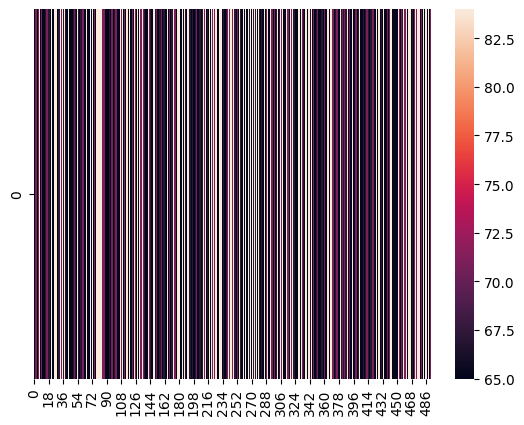

In [43]:
import seaborn as sns
import numpy as np
from Bio import SeqIO

record = SeqIO.read("/content/sequence (Mpox).fasta", "fasta")
mpox = record.seq
sequence_array = np.array([ord(c) for c in mpox])
sns.heatmap(np.array([sequence_array]))
#El mapa de calor generado a partir de su código representa la secuencia de ADN como una matriz codificada por colores.
# Cada columna del mapa de calor corresponde a un nucleótido de la secuencia, y
# la intensidad del color representa el valor numérico ASCII de ese
# nucleótido. %%

# Composición GC

In [44]:
def nucleotidos_composition(mpox):
  nucleotidos = {'G': 0, 'C': 0}
  for n in nucleotidos:
    nucleotidos[n] = mpox.count(n)/len(mpox)*100
  return nucleotidos

In [45]:
nuc = nucleotidos_composition(mpox)
nuc
#Cantidad de nucleotidos

{'G': 18.089430894308943, 'C': 15.447154471544716}

In [46]:
import pandas as pd
import seaborn as sns
ndf = pd.DataFrame(list(nuc.items()), columns=['Nucleotido', 'Porcentaje'])
ndf
ndf.head()

,Nucleotido,Porcentaje
0,G,18.089431
1,C,15.447154


<ipython-input-47-f4f0bb3573c7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  nbar = sns.barplot(x='Nucleotido', y='Porcentaje', data=ndf, palette="hls")


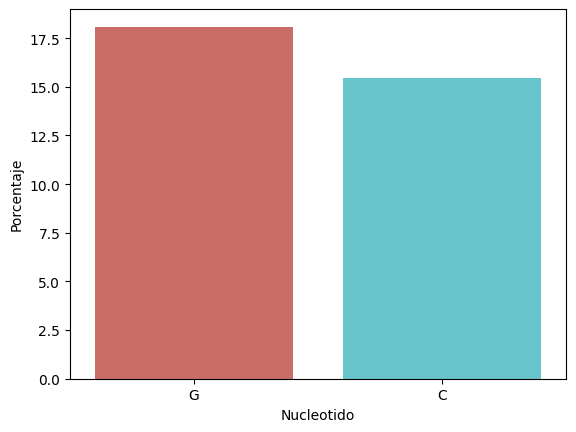

In [47]:
nbar = sns.barplot(x='Nucleotido', y='Porcentaje', data=ndf, palette="hls")
# Porcentaje de cantidad de nucleotidos

# SeqADN

In [48]:
mpox = seqfile.seq
print(mpox)

ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTATCATCCGGATATAATATATTAGATATTTTATGGGAAAAACGAGGAGCGGATAATGATAGAATTATACAGATAGATAATGGTAGCAATATGCTAATTCTGAACCCGACACAATCAGACTCTGGTATTTATATATGCATTACCACGAACGAAACCTACTGTGACATGATGTCGTTAAATTTGACAATCGTGTCTGTCTCAGAATCAAATATAGATCTTATCTCGTATCCACAAATAGTAAATGAGAGATCTACTGGTAAAATGGTATGTCCCAATATTAATGCATTTATTTCTAGTAACGTAAACGCAGATATTATATGGAGCGGACATCGACGCCTTAGAAATAAGAGACTTAAACAACGGACACCTGGAATTATTACCATAGAAGATGTTAGAAAAAATGATGCTGGTTATTATACATGTGTTTTAGAATATATATAG


# COMPLEMENTO

In [49]:
mpoxcomp = mpox.complement()
print(f" Monkeypox + Complemento de Mpox:\n {mpox}")
print(f" {''.join(['|' for c in range(len(mpox))])}")
print(f" {mpoxcomp}")

 Monkeypox + Complemento de Mpox:
 ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTATCATCCGGATATAATATATTAGATATTTTATGGGAAAAACGAGGAGCGGATAATGATAGAATTATACAGATAGATAATGGTAGCAATATGCTAATTCTGAACCCGACACAATCAGACTCTGGTATTTATATATGCATTACCACGAACGAAACCTACTGTGACATGATGTCGTTAAATTTGACAATCGTGTCTGTCTCAGAATCAAATATAGATCTTATCTCGTATCCACAAATAGTAAATGAGAGATCTACTGGTAAAATGGTATGTCCCAATATTAATGCATTTATTTCTAGTAACGTAAACGCAGATATTATATGGAGCGGACATCGACGCCTTAGAAATAAGAGACTTAAACAACGGACACCTGGAATTATTACCATAGAAGATGTTAGAAAAAATGATGCTGGTTATTATACATGTGTTTTAGAATATATATAG
 |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# TRANSCRIPCIÓN


In [50]:
rnampox = mpox.transcribe()
print(f" Monkeypox + transcripsión de Mpox:\n {mpox}")
print(f" {''.join(['|' for c in range(len(mpox))])}")
print(f" {rnampox}")

 Monkeypox + transcripsión de Mpox:
 ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTATCATCCGGATATAATATATTAGATATTTTATGGGAAAAACGAGGAGCGGATAATGATAGAATTATACAGATAGATAATGGTAGCAATATGCTAATTCTGAACCCGACACAATCAGACTCTGGTATTTATATATGCATTACCACGAACGAAACCTACTGTGACATGATGTCGTTAAATTTGACAATCGTGTCTGTCTCAGAATCAAATATAGATCTTATCTCGTATCCACAAATAGTAAATGAGAGATCTACTGGTAAAATGGTATGTCCCAATATTAATGCATTTATTTCTAGTAACGTAAACGCAGATATTATATGGAGCGGACATCGACGCCTTAGAAATAAGAGACTTAAACAACGGACACCTGGAATTATTACCATAGAAGATGTTAGAAAAAATGATGCTGGTTATTATACATGTGTTTTAGAATATATATAG
 |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# COMPLEMENTO INVERSO

In [51]:
mpoxrevcomp =mpox.reverse_complement()
print(mpox)
print(mpoxrevcomp)

ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTATCATCCGGATATAATATATTAGATATTTTATGGGAAAAACGAGGAGCGGATAATGATAGAATTATACAGATAGATAATGGTAGCAATATGCTAATTCTGAACCCGACACAATCAGACTCTGGTATTTATATATGCATTACCACGAACGAAACCTACTGTGACATGATGTCGTTAAATTTGACAATCGTGTCTGTCTCAGAATCAAATATAGATCTTATCTCGTATCCACAAATAGTAAATGAGAGATCTACTGGTAAAATGGTATGTCCCAATATTAATGCATTTATTTCTAGTAACGTAAACGCAGATATTATATGGAGCGGACATCGACGCCTTAGAAATAAGAGACTTAAACAACGGACACCTGGAATTATTACCATAGAAGATGTTAGAAAAAATGATGCTGGTTATTATACATGTGTTTTAGAATATATATAG
CTATATATATTCTAAAACACATGTATAATAACCAGCATCATTTTTTCTAACATCTTCTATGGTAATAATTCCAGGTGTCCGTTGTTTAAGTCTCTTATTTCTAAGGCGTCGATGTCCGCTCCATATAATATCTGCGTTTACGTTACTAGAAATAAATGCATTAATATTGGGACATACCATTTTACCAGTAGATCTCTCATTTACTATTTGTGGATACGAGATAAGATCTATATTTGATTCTGAGACAGACACGATTGTCAAATTTAACGACATCATGTCACAGTAGGTTTCGTTCGTGGTAATGCATATATAAATACCAGAGTCTGATTGTGTCGGGTTCAGAATTAGCATATTGCTACCATTATCTATCTGTATAATTCTATCATTATCCGCTCCTCGTTTTTCCCATAAAATATCTAATATATTATATCCGGATGATAGCGTATTTATTTGAGGACATGGTAAGATTACTGGCTCGTTTTCTAACTCCAT


# TRADUCCIÓN

In [52]:
mpoxtranslate = mpox.translate()
print(f" Monkeypox + traducción de Mpox:\n {mpox}")
print(f" {''.join(['|' for c in range(len(mpox))])}")
print(f" {mpoxtranslate}")

 Monkeypox + traducción de Mpox:
 ATGGAGTTAGAAAACGAGCCAGTAATCTTACCATGTCCTCAAATAAATACGCTATCATCCGGATATAATATATTAGATATTTTATGGGAAAAACGAGGAGCGGATAATGATAGAATTATACAGATAGATAATGGTAGCAATATGCTAATTCTGAACCCGACACAATCAGACTCTGGTATTTATATATGCATTACCACGAACGAAACCTACTGTGACATGATGTCGTTAAATTTGACAATCGTGTCTGTCTCAGAATCAAATATAGATCTTATCTCGTATCCACAAATAGTAAATGAGAGATCTACTGGTAAAATGGTATGTCCCAATATTAATGCATTTATTTCTAGTAACGTAAACGCAGATATTATATGGAGCGGACATCGACGCCTTAGAAATAAGAGACTTAAACAACGGACACCTGGAATTATTACCATAGAAGATGTTAGAAAAAATGATGCTGGTTATTATACATGTGTTTTAGAATATATATAG
 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# INFORMACIÓN


# *Base de datos donde se obtuvo la cadena del genoma parcial del virus Monkeypox*

*https://www.ncbi.nlm.nih.gov/nuccore/AB371723.1*

La viruela del mono humana (MPX), una enfermedad endémica en África ecuatorial, que ha estado causando brotes en países no endémicos desde principios de mayo de 2022. Esta es la primera vez que se notifican muchos casos de viruela del mono simultáneamente en países endémicos y no endémicos en áreas geográficas dispares
En respuesta, se han analizado 27 genes o secuencias de 643 genomas completos del virus de la viruela del mono humano (MPXV) recolectados después del 1 de enero y presentados antes del 7 de agosto de 2022.


Las complejidades de las proteínas B14R y sus ligandos. Se forman tres enlaces de hidrógeno a través de 261G, 262M y 316S con los ligandos IL-1β 113N, 108K y 20Q, con longitudes de enlace de 3,4 Å, 3,4 Å y 2,7 Å. En la mayoría de los MPXV de 2022, se forman cuatro enlaces de hidrógeno a través de los modelos 108D, 131Q y 113N (dos veces) al ligando IL-1β 146Q, 27G y 79K y 84T, con longitudes de enlace de 2,0 Å, 2,0 Å, 3,0 Å y 3,4 Å. La cinta cian y los residuos de aminoácidos azules, y la cinta verde y los residuos de aminoácidos rojos representan las proteínas B14R y los ligandos IL-1β, respectivamente. Los números denotan los valores de longitud de los enlaces de hidrógeno


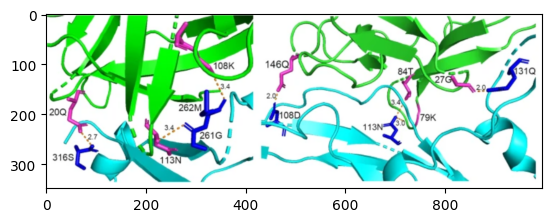

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('GENOMA.png')
imgplot = plt.imshow(img)
plt.show()

# Referencias

https://biopython.org/docs/latest/Tutorial/chapter_seq_objects.html

https://milliams.com/courses/biopython/Input%20and%20Output.html

https://people.duke.edu/~ccc14/pcfb/biopython/BiopythonEntrez.html

https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/

https://ucodemy.github.io/pybioq/11_Biopython/

https://www.nature.com/articles/s41392-023-01540-2